In [1]:
# import your package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns

%matplotlib inline

In [2]:
# set up your API
import quandl
quandl.ApiConfig.api_key = 's-bsuqptLiUnnKtWKKUP'

In [3]:
data = pd.read_excel('TSX Analysis.xlsx')


In [4]:
data.head()

,Ticker,Name,FactSet Industry,Stock Exchange,52 Week Low - High Range,Market Cap,Latest Price,Dividend Amount,Dividend Yield,Book Value Per Share,Price to Book Value,Return on Average Invested Capital
0,VNP,5N Plus Inc.,Chemicals: Specialty,TORONTO,0.69 - 2.87,79.4853,0.953039,-,-,1.40641,0.756674,1.0913
1,AAB,Aberdeen International Inc.,Financial Conglomerates,TORONTO,0.01 - 0.04,1.32668,0.013812,0.010263,0,0.21247,0.086896,-65.3934
2,ABT,Absolute Software Corporation,Packaged Software,TORONTO,4.63 - 7.99,236.571,5.58702,0.060166,4.01002,-1.2176,-,-
3,ADN,Acadian Timber Corp.,Forest Products,TORONTO,8.01 - 14.08,148.662,8.90884,0.222103,6.97115,13.2494,0.750822,5.14318
4,AEF,"Acasta Enterprises, Inc.",Miscellaneous Commercial Services,TORONTO,0.21 - 0.75,15.2952,0.207182,-,-,0.18337,1.26162,-12.2623


In [5]:
data.isnull().sum()

Ticker                                1
Name                                  0
FactSet Industry                      0
Stock Exchange                        0
52 Week Low - High Range              0
Market Cap                            0
Latest Price                          0
Dividend Amount                       0
Dividend Yield                        0
Book Value Per Share                  0
Price to Book Value                   0
Return on Average Invested Capital    0
dtype: int64

In [6]:
data.dtypes

Ticker                                object
Name                                  object
FactSet Industry                      object
Stock Exchange                        object
52 Week Low - High Range              object
Market Cap                            object
Latest Price                          object
Dividend Amount                       object
Dividend Yield                        object
Book Value Per Share                  object
Price to Book Value                   object
Return on Average Invested Capital    object
dtype: object

In [7]:
tmp = data.columns[5:]
tmp

Index(['Market Cap', 'Latest Price', 'Dividend Amount', 'Dividend Yield',
       'Book Value Per Share ', 'Price to Book Value',
       'Return on Average Invested Capital'],
      dtype='object')

In [8]:
data.replace('-',value=0, inplace=True)

In [9]:
tmpdate = pd.DataFrame(data['52 Week Low - High Range'].str.split("-", expand=True))
tmpdate.rename(columns={0: '52 Week Low', 1: "52 Week High"}, inplace=True)
tmpdate = tmpdate.astype(float)

data['52 Week Low'] = tmpdate['52 Week Low']
data['52 Week High'] = tmpdate['52 Week High']
data['52 Week Price Difference'] = data['52 Week High'] - data['52 Week Low']
data.head()


,Ticker,Name,FactSet Industry,Stock Exchange,52 Week Low - High Range,Market Cap,Latest Price,Dividend Amount,Dividend Yield,Book Value Per Share,Price to Book Value,Return on Average Invested Capital,52 Week Low,52 Week High,52 Week Price Difference
0,VNP,5N Plus Inc.,Chemicals: Specialty,TORONTO,0.69 - 2.87,79.485340,0.953039,0.000000,0.000000,1.40641,0.756674,1.091299,0.69,2.87,2.18
1,AAB,Aberdeen International Inc.,Financial Conglomerates,TORONTO,0.01 - 0.04,1.326685,0.013812,0.010263,0.000000,0.21247,0.086896,-65.393410,0.01,0.04,0.03
2,ABT,Absolute Software Corporation,Packaged Software,TORONTO,4.63 - 7.99,236.571060,5.587017,0.060166,4.010025,-1.21760,0.000000,0.000000,4.63,7.99,3.36
3,ADN,Acadian Timber Corp.,Forest Products,TORONTO,8.01 - 14.08,148.661820,8.908840,0.222103,6.971154,13.24942,0.750822,5.143178,8.01,14.08,6.07
4,AEF,"Acasta Enterprises, Inc.",Miscellaneous Commercial Services,TORONTO,0.21 - 0.75,15.295237,0.207182,0.000000,0.000000,0.18337,1.261617,-12.262291,0.21,0.75,0.54


In [10]:
print("There are " + str(data['FactSet Industry'].nunique())+ " unique industires")

There are 105 unique industires


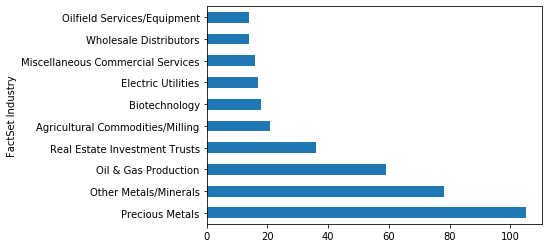

In [11]:
industries = data.groupby('FactSet Industry')
industries = industries.count()
industries.sort_values(by='Ticker', ascending=False, inplace=True)
industries = industries[0:10]

industries = industries['Ticker']
industries.plot.barh()


In [12]:
quandltickers = pd.read_csv('XTSE_metadata.csv')
data = data[data['Ticker'].isin(quandltickers['Ticker'])]

In [13]:
#calibrating
stocks = data
stocks['Dividend Yield Percent'] = stocks['Dividend Yield'] / 100
stocks['Return on Average Invested Capital'] = stocks['Return on Average Invested Capital'] / 100
stocks['Over Valuation'] = stocks['Book Value Per Share '] - stocks['Latest Price']


filterstocks = stocks[(stocks['Latest Price'].between(5, 100)) & 
                      (stocks['Dividend Yield Percent']>.01 ) & (stocks['Return on Average Invested Capital']>.01) 
                      & (stocks['Over Valuation']>0)]

filterstocks.head()

,Ticker,Name,FactSet Industry,Stock Exchange,52 Week Low - High Range,Market Cap,Latest Price,Dividend Amount,Dividend Yield,Book Value Per Share,Price to Book Value,Return on Average Invested Capital,52 Week Low,52 Week High,52 Week Price Difference,Dividend Yield Percent,Over Valuation
3,ADN,Acadian Timber Corp.,Forest Products,TORONTO,8.01 - 14.08,148.66182,8.908840,0.222103,6.971154,13.24942,0.750822,0.051432,8.01,14.08,6.07,0.069712,4.340580
11,ARE,Aecon Group Inc.,Engineering & Construction,TORONTO,7.52 - 16.56,517.87950,8.584255,0.111467,3.310502,10.89754,0.879602,0.049023,7.52,16.56,9.04,0.033105,2.313285
30,ALC,Algoma Central Corporation,Marine Shipping,TORONTO,4.84 - 10.53,193.22792,5.110498,0.090535,3.144172,13.46452,0.423823,0.025749,4.84,10.53,5.69,0.031442,8.354022
38,ALA,AltaGas Ltd.,Integrated Oil,TORONTO,5.99 - 17.20,2101.47680,7.520719,0.055249,4.853387,16.40774,0.511827,0.058733,5.99,17.20,11.21,0.048534,8.887021
61,AI,Atrium Mortgage Investment Corp.,Finance/Rental/Leasing,TORONTO,4.62 - 11.35,219.74646,5.220995,0.056152,6.206896,8.39098,0.694788,0.054118,4.62,11.35,6.73,0.062069,3.169985


In [14]:
filterstocks['Ticker'].count()

40

In [15]:
tickerlist = list(filterstocks['Ticker'])
tickerlist 


['ADN',
 'ARE',
 'ALC',
 'ALA',
 'AI',
 'BMO',
 'BNS',
 'CAL',
 'CM',
 'CNQ',
 'CWB',
 'EQB',
 'EIF',
 'FTT',
 'FC',
 'MIC',
 'GWO',
 'HDI',
 'IAG',
 'IMO',
 'IPL',
 'KEY',
 'LB',
 'LNF',
 'MG',
 'MFC',
 'MKP',
 'MX',
 'MTY',
 'NFI',
 'NTR',
 'PLC',
 'PFB',
 'PIF',
 'PSK',
 'RUS',
 'ZZZ',
 'SLF',
 'SU',
 'TOU']

In [16]:
stockdata = {}  # set up the dictionary 
benchmarks = ['XIU', 'XSB']
for s in tickerlist + benchmarks:
    
    stockdata[s] = quandl.get("XTSE/"+s, start_date="2013-12-31") # for US stocks: quandl.get("EOD/"+s) 

In [17]:
# Create a price and trade volume dataframe
prc = pd.DataFrame()  # where to store the price data
  # where to store the volume data
for s in tickerlist + benchmarks:
    # get the returns
    tmp = stockdata[s][['Close']]  # IMPORTANT: if US stocks, use Adj_Close (includes dividends)
    tmp.columns = [s]  # renaming the column with TICKER name
    prc = pd.concat([prc, tmp], axis=1)
    prc = prc[prc.index.weekday < 5]  # get rid of weekend observations

In [18]:
prc.head()

,ADN,ARE,ALC,ALA,AI,BMO,BNS,CAL,CM,CNQ,...,PFB,PIF,PSK,RUS,ZZZ,SLF,SU,TOU,XIU,XSB
Date,,,,,,,,,,,,,,,,,,,,,
2013-12-31,8.603348,13.355176,13.580603,28.117269,6.877080,56.851455,47.162755,2.756491,67.147874,28.563925,...,3.584800,139.353293,NaN,21.420406,NaN,29.812197,30.372787,42.039489,16.594200,24.703029
2014-01-01,8.603348,13.355176,13.580603,28.117269,6.877080,56.851455,47.162755,2.756491,67.147874,28.563925,...,3.584800,139.353293,NaN,21.420406,NaN,29.812197,30.372787,42.039489,16.594200,24.703029
2014-01-02,8.455862,13.180870,13.629689,28.096579,6.978587,56.787225,46.864571,2.903504,66.666766,28.095013,...,3.577408,139.353293,NaN,21.113328,NaN,29.406968,30.005769,42.171156,16.560489,24.737699
2014-01-03,8.441816,13.247272,13.621508,28.055200,6.927834,57.036116,46.914739,2.903504,66.215264,27.840687,...,3.577408,147.550546,NaN,21.120152,NaN,29.327511,29.834493,42.020680,16.493067,24.720364
2014-01-06,8.533117,13.355176,13.703319,28.110372,6.972243,56.875541,46.398720,2.682985,65.719353,27.800949,...,3.658713,147.550546,NaN,20.874490,NaN,29.200380,29.834493,43.647711,16.408790,24.729032


In [19]:
returns = prc.pct_change(1)
returns.head()

,ADN,ARE,ALC,ALA,AI,BMO,BNS,CAL,CM,CNQ,...,PFB,PIF,PSK,RUS,ZZZ,SLF,SU,TOU,XIU,XSB
Date,,,,,,,,,,,,,,,,,,,,,
2013-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
2014-01-02,-0.017143,-0.013052,0.003614,-0.000736,0.014760,-0.001130,-0.006322,0.053333,-0.007165,-0.016416,...,-0.002062,0.000000,NaN,-0.014336,NaN,-0.013593,-0.012084,0.003132,-0.002031,0.001403
2014-01-03,-0.001661,0.005038,-0.000600,-0.001473,-0.007273,0.004383,0.001070,0.000000,-0.006773,-0.009052,...,0.000000,0.058824,NaN,0.000323,NaN,-0.002702,-0.005708,-0.003568,-0.004071,-0.000701
2014-01-06,0.010815,0.008145,0.006006,0.001967,0.006410,-0.002815,-0.010999,-0.075949,-0.007489,-0.001427,...,0.022727,0.000000,NaN,-0.011632,NaN,-0.004335,0.000000,0.038720,-0.005110,0.000351


In [20]:
# for all the 12 intervals (4 week per interval) we get the price for all stocks we have for that day
 # only price that is on date of our ticker date to easy call rows in final loop 
filterprice = returns

filterprice = filterprice.T
filterprice


date = filterprice.columns
date = pd.DataFrame(date)
date = date.T
date.columns = date.loc['Date']


filterprice = filterprice.append(date)
filterprice.loc['Date'] = pd.to_datetime(filterprice.loc['Date'], format='%Y-%m-%d')

rangefilter = len(filterprice) - 1
filterprice = filterprice[:rangefilter]
filterprice.tail(3)


Date,2013-12-31,2014-01-01,2014-01-02,2014-01-03,2014-01-06,2014-01-07,2014-01-08,2014-01-09,2014-01-10,2014-01-13,...,2020-03-12,2020-03-13,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-23,2020-03-24,2020-03-25
TOU,NaN,0,0.00313198,-0.00356822,0.0387198,0.00840337,-0.0241453,-0.00153272,0.00109649,-0.00328587,...,-0.0778816,0.0228311,-0.0814732,-0.0036452,-0.0390244,0.0215736,-0.0757764,-0.0873656,0.0972018,0.0993289
XIU,NaN,0,-0.00203149,-0.00407126,-0.00510984,0.00821779,0.00305652,0.0015236,0.010142,-0.00552209,...,-0.0913327,0.0676923,-0.0991835,0.0322581,-0.0630165,0.0314223,-0.0277926,-0.048928,0.122543,0
XSB,NaN,0,0.00140347,-0.000700752,0.000350642,0.00175252,0.000349906,0.000699567,0.00139808,0,...,-0.0275295,0.00992647,-0.0520568,0.0176651,-0.0320755,0.0378168,0.00676183,0.00671642,0.00481838,0


In [21]:
# turn the data in the previous table into 1 giant list for easy merge
myList = []


for x in range(len(filterprice)):
    name = filterprice.iloc[x].name
    columnIterator = 0
    for y in range(len(filterprice.iloc[x])):
        date = filterprice.columns[columnIterator]
        columnIterator = columnIterator + 1        
        price = filterprice.iloc[x][y]
        myRow = []
        myRow.append(name)
        myRow.append(date)
        myRow.append(price)
        myList.append(myRow)
       
allprice = pd.DataFrame(myList)
allprice.rename(columns={0: 'Ticker', 1: 'Date', 2: 'Returns'}, inplace=True)

allprice

,Ticker,Date,Returns
0,ADN,2013-12-31,NaN
1,ADN,2014-01-01,0.000000
2,ADN,2014-01-02,-0.017143
3,ADN,2014-01-03,-0.001661
4,ADN,2014-01-06,0.010815
...,...,...,...
68329,XSB,2020-03-19,0.037817
68330,XSB,2020-03-20,0.006762
68331,XSB,2020-03-23,0.006716
68332,XSB,2020-03-24,0.004818


In [22]:
marketreturn = allprice[allprice['Ticker'] == "XIU"]
marketreturn.reset_index(drop=True)
marketreturn.rename(columns={'Returns': 'Market Return'}, inplace=True)


marketreturn.head()

C:\Users\Rahim\Anaconda3\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


,Ticker,Date,Market Return
65080,XIU,2013-12-31,NaN
65081,XIU,2014-01-01,0.000000
65082,XIU,2014-01-02,-0.002031
65083,XIU,2014-01-03,-0.004071
65084,XIU,2014-01-06,-0.005110


In [23]:
rfdata = allprice[allprice['Ticker'] == "XSB"]
rfdata.reset_index(drop=True)
rfdata['rf'] = rfdata['Returns'].mean()*252

rfdata.head()

C:\Users\Rahim\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Ticker,Date,Returns,rf
66707,XSB,2013-12-31,NaN,0.015039
66708,XSB,2014-01-01,0.000000,0.015039
66709,XSB,2014-01-02,0.001403,0.015039
66710,XSB,2014-01-03,-0.000701,0.015039
66711,XSB,2014-01-06,0.000351,0.015039


In [24]:
allprice = allprice[allprice['Ticker'].isin(tickerlist)]

allprice = pd.merge(allprice, rfdata[['rf','Date']], on=['Date'], how='left')
allprice = pd.merge(allprice, marketreturn[['Market Return','Date']], on=['Date'], how='left')
allprice = allprice[1:]
allprice["EXMKT"] = allprice['Market Return'] - allprice['rf']
allprice["EXRET"] = allprice['Returns'] - allprice['rf']


allprice

,Ticker,Date,Returns,rf,Market Return,EXMKT,EXRET
1,ADN,2014-01-01,0.000000,0.015039,0.000000,-0.015039,-0.015039
2,ADN,2014-01-02,-0.017143,0.015039,-0.002031,-0.017070,-0.032181
3,ADN,2014-01-03,-0.001661,0.015039,-0.004071,-0.019110,-0.016700
4,ADN,2014-01-06,0.010815,0.015039,-0.005110,-0.020148,-0.004223
5,ADN,2014-01-07,0.004938,0.015039,0.008218,-0.006821,-0.010100
...,...,...,...,...,...,...,...
65075,TOU,2020-03-19,0.021574,0.015039,0.031422,0.016384,0.006535
65076,TOU,2020-03-20,-0.075776,0.015039,-0.027793,-0.042831,-0.090815
65077,TOU,2020-03-23,-0.087366,0.015039,-0.048928,-0.063967,-0.102404
65078,TOU,2020-03-24,0.097202,0.015039,0.122543,0.107505,0.082163


In [25]:
reg = smf.ols('EXRET~EXMKT', data=allprice).fit()

In [26]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  EXRET   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     8409.
Date:                Wed, 25 Mar 2020   Prob (F-statistic):               0.00
Time:                        19:57:08   Log-Likelihood:             1.4260e+05
No. Observations:               61447   AIC:                        -2.852e+05
Df Residuals:                   61445   BIC:                        -2.852e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0009      0.000     -4.742      0.000      -0.001      -0.001
EXMKT          0.9420      0.010     91.699      0.000       0.922       0.962
==============================================================================
Omnibus:                   104826.851   Durbin-Watson:                   2.250
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        887304577.016
Skew:                          10.927   Prob(JB):                         0.00
Kurtosis:                     591.291   Cond. No.                         107.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
filterallprice = allprice[allprice['Date'].between('2020-03-01','2020-03-24')]

In [28]:
filterallprice = filterallprice.pivot(columns='Ticker', values='Returns', index='Date')

In [29]:
ew_port = 1 + filterallprice
# Assign a 1$ dollar investment at the beginning of your portfolio formation.
# Essentially, I am creating a row with a 1 in each column to represent a $1 initial investment.
ew_port.loc[pd.to_datetime('2020-03-02')] = 1
ew_port = ew_port.sort_index()
# preview
ew_port[:5]

Ticker,ADN,AI,ALA,ALC,ARE,BMO,BNS,CAL,CM,CNQ,...,NTR,PFB,PIF,PLC,PSK,RUS,SLF,SU,TOU,ZZZ
Date,,,,,,,,,,,,,,,,,,,,,
2020-03-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2020-03-03,1.010557,0.988835,1.007756,0.940699,0.960952,0.976982,0.986822,1.018800,0.982212,0.971002,...,0.995242,1.000000,1.001308,0.976404,0.978005,0.995536,0.982212,0.969313,0.956406,0.967638
2020-03-04,1.016251,1.021171,1.042328,1.019862,1.017143,1.010558,1.015652,1.034776,1.021161,0.999095,...,1.008091,0.982788,1.063357,1.016494,1.008032,1.005481,1.030355,1.014196,1.016744,1.018395
2020-03-05,0.976585,0.991707,0.988463,1.001693,1.051810,0.967887,0.972148,1.023320,0.978024,0.983696,...,0.989602,0.999124,0.949631,0.985283,1.001594,0.991576,0.968530,0.973964,1.000000,1.039409
2020-03-06,1.009357,0.982578,0.966853,0.993238,1.025519,0.958641,0.975713,0.991287,0.975559,0.928791,...,0.952627,1.016652,0.968305,0.994255,0.957836,0.966017,0.976149,0.963495,1.006404,0.998947


In [30]:
ew_port = ew_port.cumprod()
topport = ew_port.tail(1)
topport

Ticker,ADN,AI,ALA,ALC,ARE,BMO,BNS,CAL,CM,CNQ,...,NTR,PFB,PIF,PLC,PSK,RUS,SLF,SU,TOU,ZZZ
Date,,,,,,,,,,,,,,,,,,,,,
2020-03-24,0.756598,0.527565,0.532442,0.601137,0.767974,0.695983,0.740541,0.950832,0.726025,0.417112,...,0.76519,0.746988,0.600392,0.674906,0.580518,0.581845,0.679824,0.479428,0.671891,0.492449


In [31]:
topport1 = topport.T
top5tickers = topport1.sort_values(by='2020-03-24', ascending = False)[:7]
top5tickers

Date,2020-03-24
Ticker,
CAL,0.950832
ARE,0.767974
NTR,0.765190
ADN,0.756598
PFB,0.746988
BNS,0.740541
LB,0.736404


In [32]:
top5tickersplot = pd.DataFrame()
for s in top5tickers.index:

    tmp = ew_port[s]
    tmp.columns = [s]
    top5tickersplot = pd.concat([top5tickersplot, tmp], axis=1)

top5tickersplot

,CAL,ARE,NTR,ADN,PFB,BNS,LB
2020-03-02 00:00:00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2020-03-03 00:00:00,1.018800,0.960952,0.995242,1.010557,1.000000,0.986822,0.987770
2020-03-04 00:00:00,1.054230,0.977425,1.003294,1.026979,0.982788,1.002267,0.999740
2020-03-05 00:00:00,1.078814,1.028066,0.992862,1.002933,0.981928,0.974352,0.985688
2020-03-06 00:00:00,1.069414,1.054301,0.945827,1.012317,0.998279,0.950687,0.965652
2020-03-09 00:00:00,1.010846,0.993899,0.864751,0.949560,0.953528,0.841576,0.845693
2020-03-10 00:00:00,1.009400,1.017084,0.850110,0.939589,0.922547,0.854471,0.887848
2020-03-11 00:00:00,0.979754,0.965223,0.805637,0.911437,0.882960,0.828681,0.848816
2020-03-12 00:00:00,0.876356,0.876144,0.711750,0.760117,0.860585,0.717869,0.732761
2020-03-13 00:00:00,0.871294,0.948139,0.793558,0.819941,0.921687,0.838742,0.840489


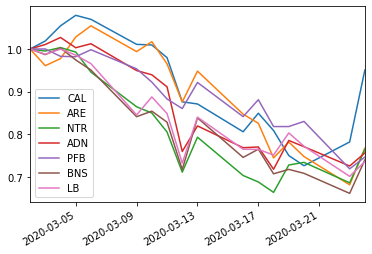

In [33]:
top5tickersplot.plot()